In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd 
import seaborn as sns; sns.set(font_scale=1.3)

**1). Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.**

Загрузим данные в датафрейм и отсортируем по индексу:

In [2]:
duq_df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
duq_df.sort_index(inplace=True)
duq_df.head()

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364.0
2005-01-01 02:00:00,1273.0
2005-01-01 03:00:00,1218.0
2005-01-01 04:00:00,1170.0
2005-01-01 05:00:00,1166.0


Построим график временного ряда:

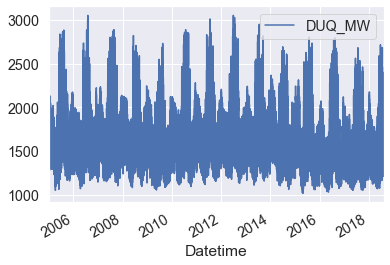

In [3]:
duq_df.plot()
plt.show()

В качестве описания ряда следует отметить:
 - судя по всему, есть небольшой убывающий тренд;
 - явное и постоянное присутствие сезонных колебаний и, возможно, колебаний большего цикла.

В ряде 119068 значений с 2005-01-01 01:00:00 по 2018-08-03 00:00:00:

In [4]:
duq_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 6.8 MB


Статистики ряда:

In [5]:
duq_df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Их визуализация боксплотом:

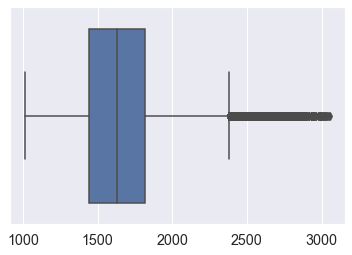

In [6]:
sns.boxplot(duq_df)
plt.show()

Сколько пропусков:

In [7]:
duq_df['DUQ_MW'].isnull().sum()

0

Уникальных индексов на 4 меньше, чем значений в ряду (119068): 

In [8]:
duq_df.index.nunique()

119064

Перенесем дату и время в отдельный признак:

In [9]:
duq_df.reset_index(inplace=True)
duq_df.head()

,Datetime,DUQ_MW
0,2005-01-01 01:00:00,1364.0
1,2005-01-01 02:00:00,1273.0
2,2005-01-01 03:00:00,1218.0
3,2005-01-01 04:00:00,1170.0
4,2005-01-01 05:00:00,1166.0


Подсчитаем размеры временных отсчетов и количества каждого из них:

In [10]:
timedelta = duq_df['Datetime'] - duq_df['Datetime'].shift()
timedelta = timedelta.dt.seconds
timedelta.value_counts()

3600.0    119039
7200.0        24
0.0            4
Name: Datetime, dtype: int64

Разница между отсчетами почти всегда 1 час. Есть 24 случая, когда 2 часа - вероятно, это пропуск; и есть 4 случая, когда 0 часов - судя по всему, это 4 значения неуникальных даты и времени. Проверим это.

Когда разница 0 часов:

In [11]:
duq_df.loc[timedelta == 0, :]

,Datetime,DUQ_MW
86190,2014-11-02 02:00:00,1240.0
94926,2015-11-01 02:00:00,1138.0
103830,2016-11-06 02:00:00,1107.0
112566,2017-11-05 02:00:00,1105.0


Да, есть повтор даты и времени:

In [12]:
duq_df.iloc[86188:86192, :]

,Datetime,DUQ_MW
86188,2014-11-02 01:00:00,1222.0
86189,2014-11-02 02:00:00,1272.0
86190,2014-11-02 02:00:00,1240.0
86191,2014-11-02 03:00:00,1238.0


Когда разница 2 часа:

In [13]:
duq_df.loc[timedelta == 7200]

,Datetime,DUQ_MW
2210,2005-04-03 04:00:00,1263.0
7248,2005-10-30 03:00:00,1261.0
10944,2006-04-02 04:00:00,1182.0
15982,2006-10-29 03:00:00,1300.0
19174,2007-03-11 04:00:00,1398.0
24884,2007-11-04 03:00:00,1236.0
27908,2008-03-09 04:00:00,1481.0
33618,2008-11-02 03:00:00,1166.0
36642,2009-03-08 04:00:00,1117.0
42352,2009-11-01 03:00:00,1198.0


Пропуск подтверждается:

In [14]:
duq_df.iloc[2209:2212, :]

,Datetime,DUQ_MW
2209,2005-04-03 02:00:00,1310.0
2210,2005-04-03 04:00:00,1263.0
2211,2005-04-03 05:00:00,1264.0


**2). Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.**

Загрузим данные в датафрейм и отсортируем по индексу:

In [15]:
brent_df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_df.sort_index(inplace=True)
brent_df.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [16]:
# переименуем признак для удобства
brent_df.rename(columns={'Значение': 'Brent'}, inplace=True)

Построим ежедневный график цены Brent:

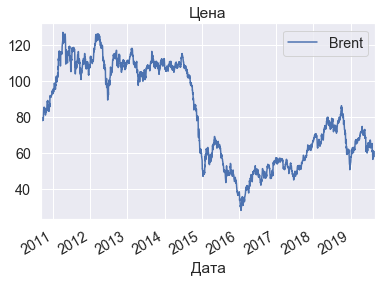

In [17]:
brent_df.plot()
plt.title('Цена')
plt.show()

**3). Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.**

Построим графики средних и среднеквадратических отклонений перерасчетов цены Brent за год, месяц и неделю:

In [18]:
def visualize_resamle(df, rule, period):
    _, axes = plt.subplots(1, 2, figsize=(13, 4))
    
    df.resample(rule).mean().plot(ax=axes[0], c='darkgreen')
    axes[0].set_title(f'Средняя цена за {period}')
    
    df.resample(rule).std(ddof=1).plot(ax=axes[1], c='crimson')
    axes[1].set_title(f'СКО цены за {period}')

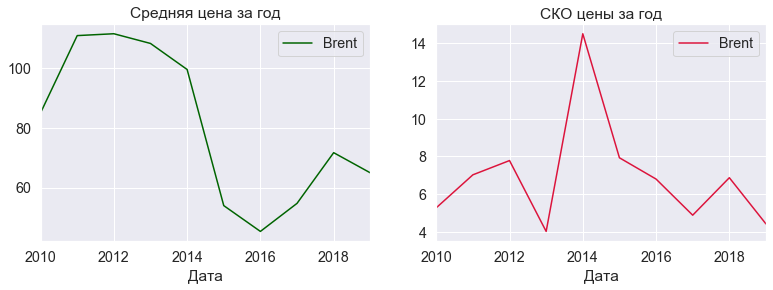

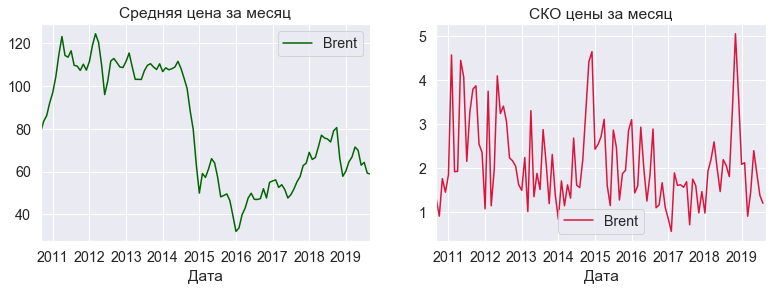

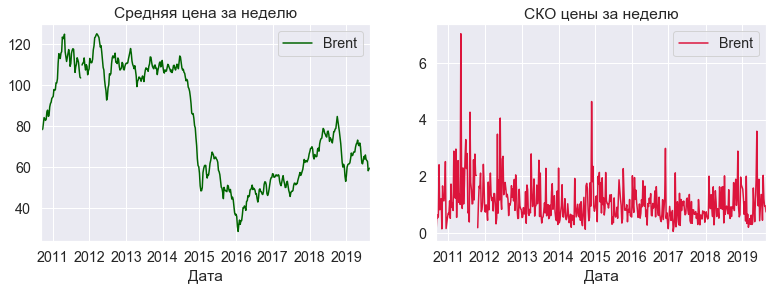

In [19]:
visualize_resamle(brent_df, 'Y', 'год')
visualize_resamle(brent_df, 'M', 'месяц')
visualize_resamle(brent_df, 'W', 'неделю')

**4). Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

С увеличением периода перерасчета график среднего сглаживается, но поведение, в целом, не меняется. Амплитуда разброса при этом увеличивается.